In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [4]:
boston=datasets.load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
bostondf = pd.DataFrame(boston.data, columns=boston.feature_names)
bostondf['output']=boston.target
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,output
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

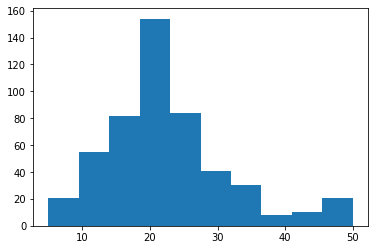

In [7]:
plt.hist(bostondf['output'])

In [8]:
bostondf.isnull().sum()
bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,output
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
bostoncorr=bostondf.corr().round(2)

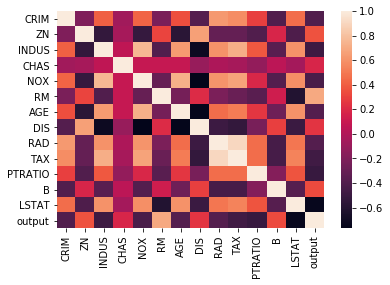

In [12]:
sns.heatmap(bostoncorr)
plt.rcParams["figure.figsize"]=10,10

In [13]:
x=pd.DataFrame(np.vstack((bostondf['LSTAT'],bostondf['RM'])).T,columns=['LSTAT','RM'])
x

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [14]:
y=bostondf['output']

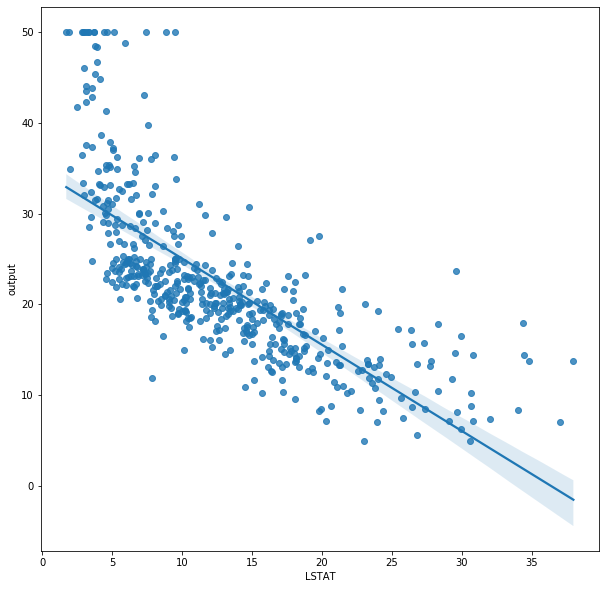

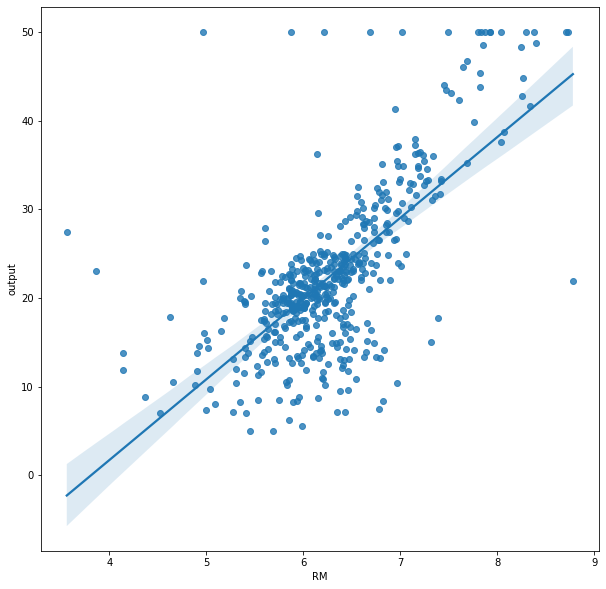

In [15]:
sns.regplot(x['LSTAT'],y)
plt.show()
sns.regplot(x['RM'],y)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
#x_test=x_test.values.reshape(1,-1)
#y_test=y_test.values.reshape(1,-1)
linmodel=LinearRegression()

(404, 2)
(404,)


In [18]:
linmodel=linmodel.fit(x,y)
linmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_predict=linmodel.predict(x_train)
#plt.scatter(x_train,y_predict,color='yellow')
y_predict

array([15.89983805, 36.97788005, 15.74595036, 23.98921598, 18.22245167,
       21.8687353 , 25.26308832, 15.85869849, 28.14429469, 21.63017953,
       20.61292555, 29.31968013, 21.15852796, 12.01521584, 18.21274954,
       17.28696205, 18.24650673, 19.10739721, 23.07991295, 32.28899561,
       26.45392061, 19.72807333, 23.78518476, 28.26259609, 21.7832886 ,
       17.44974913, 22.7011548 , 36.85537831, 37.15793504, 24.3660485 ,
       14.08066091, 18.12183323, 18.44620086, 21.60894454, 14.6387614 ,
        4.1767872 , 27.21060683, 29.96284283, 21.79919554, 20.33664069,
       18.9297215 , 22.13363049, 31.44880281, 22.86946459, 28.94101368,
       19.44389291, 23.74364784, 27.77563603, 14.78682073, 32.48537902,
       16.14520992, 16.37019782, 28.05969258, 32.4841017 , 14.82770934,
       27.90170267, 32.40652   , 31.05029451, 21.82372195, 31.24871937,
        6.35742724, 31.19378511, 26.33937234, 18.72006301, 18.74440281,
       17.4673983 , 30.80793576, 12.21067586, 23.82712868, 21.71

In [20]:
np.sqrt(mean_squared_error(y_train,y_predict))

5.65357693087156

In [21]:
y_test_predict=linmodel.predict(x_test)

In [22]:
np.sqrt(mean_squared_error(y_test,y_test_predict))
r2 = r2_score(y_test, y_test_predict)
print(r2)

0.6836598221754846
